# Baseball Case Study

# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

*  Input features: 
*   Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

*  Output: 
*     Number of predicted wins (W)

*  To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Importing Required Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

# Laoding dataset

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Exploratory Data Analyisis(EDA)

In [3]:
df.describe(include='all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


*  The above inforamtion gives no.of rows,null values and datatypes

In [5]:
df.shape    #To get No.of rows and columns

(30, 17)

# Finding Null values

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

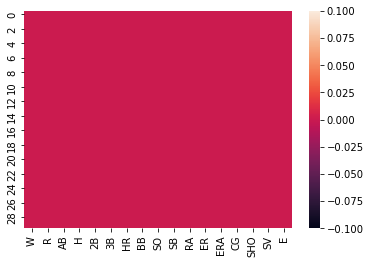

In [7]:
sns.heatmap(df.isnull())

*  Hence there is no null values in the data

# Data Visualization

<AxesSubplot:xlabel='R', ylabel='W'>

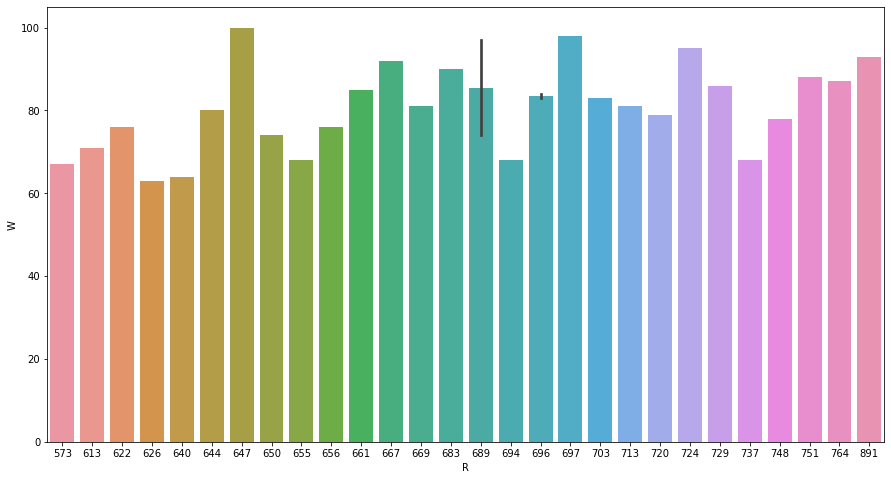

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x='R',y='W',data=df)

<AxesSubplot:>

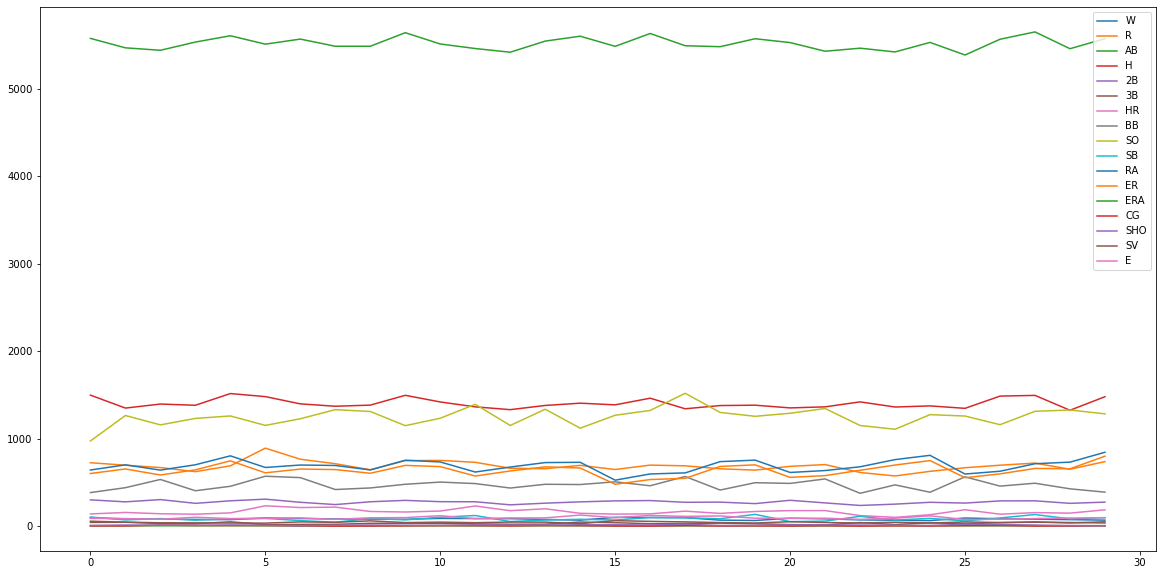

In [9]:
df.plot(figsize=(20,10))

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

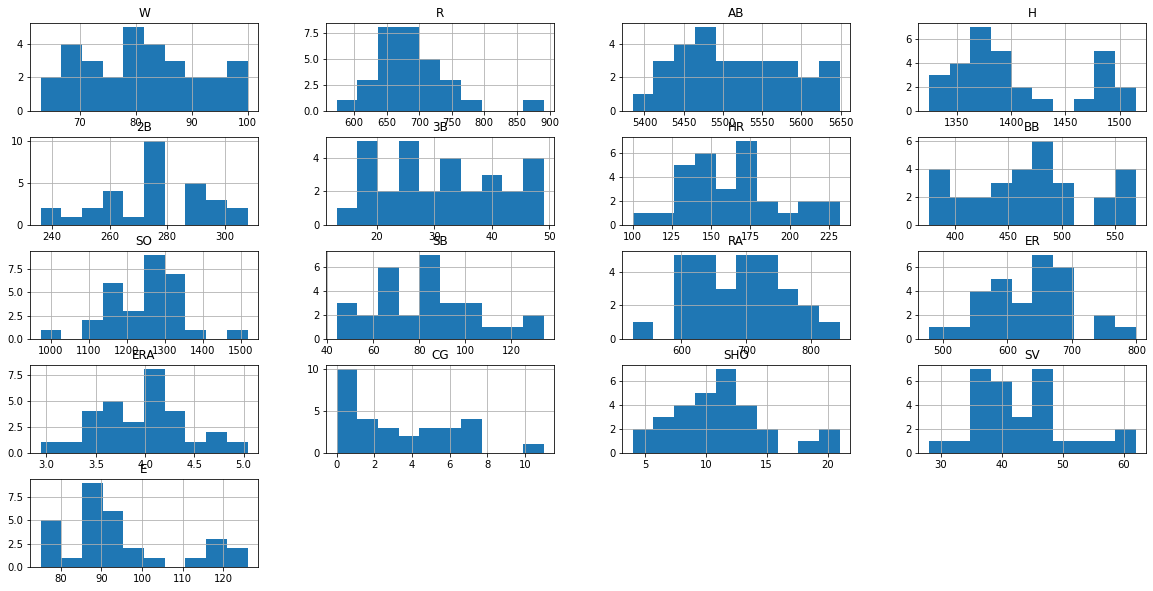

In [10]:
df.hist(figsize=(20,10))

# Distribution plot

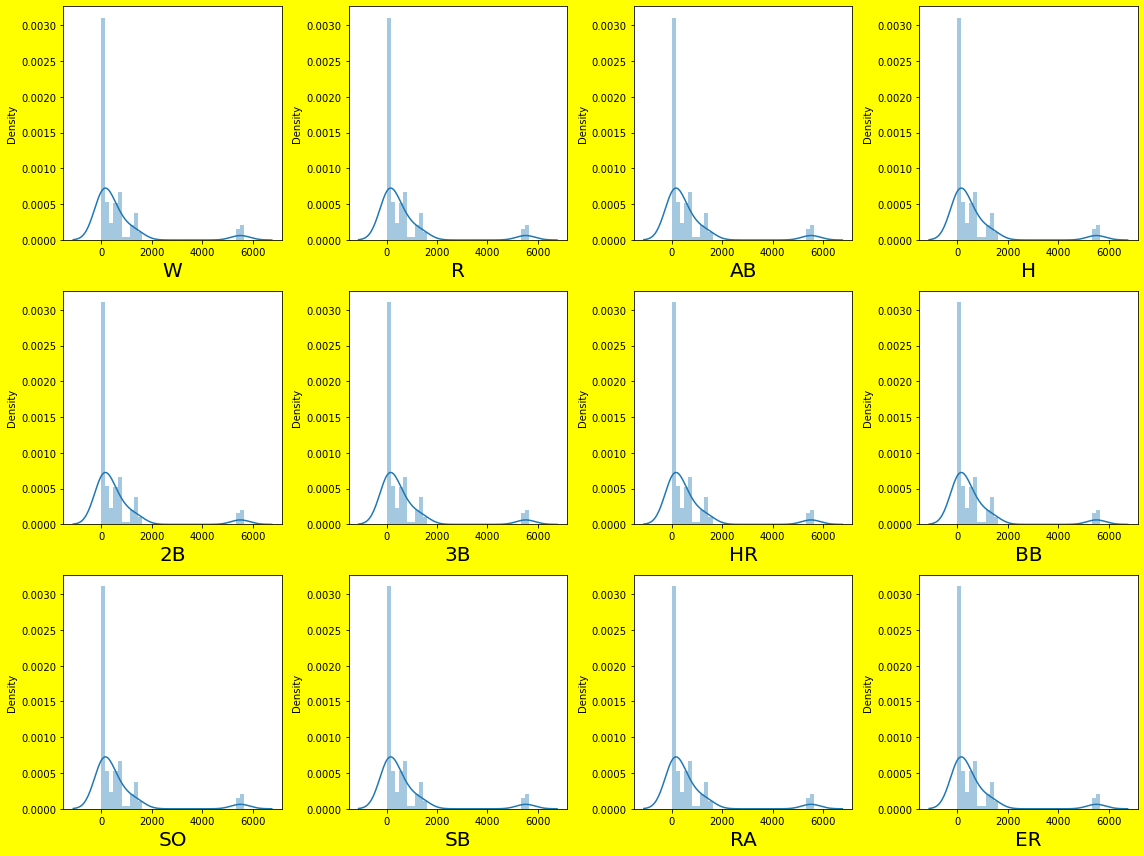

In [11]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df)
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()
    

# Correlation matrix

In [12]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

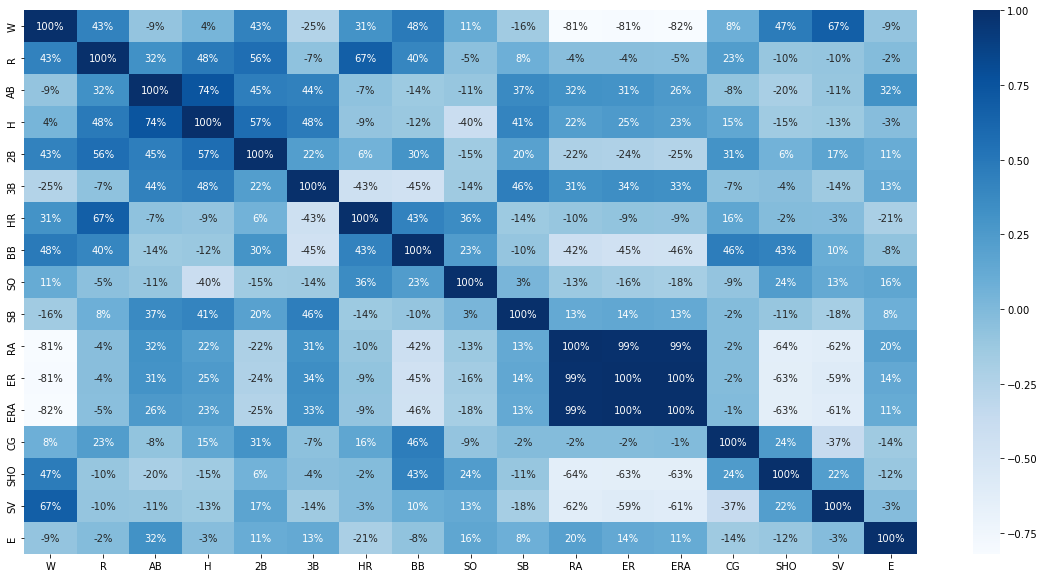

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.0%')

*  The above plot shows positive and negetive correlation between features and labels

<AxesSubplot:xlabel='ERA', ylabel='W'>

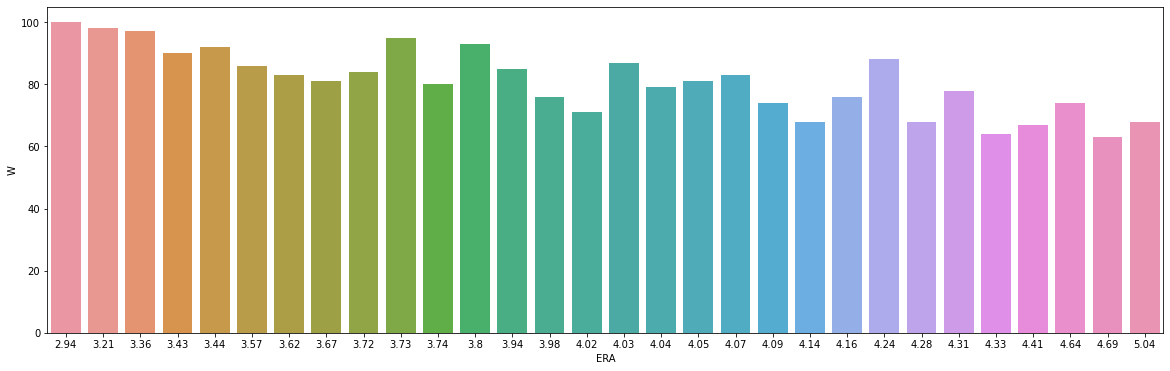

In [14]:
plt.figure(figsize=(20,6))
sns.barplot(x='ERA',y='W',data=df)

<AxesSubplot:xlabel='ER', ylabel='W'>

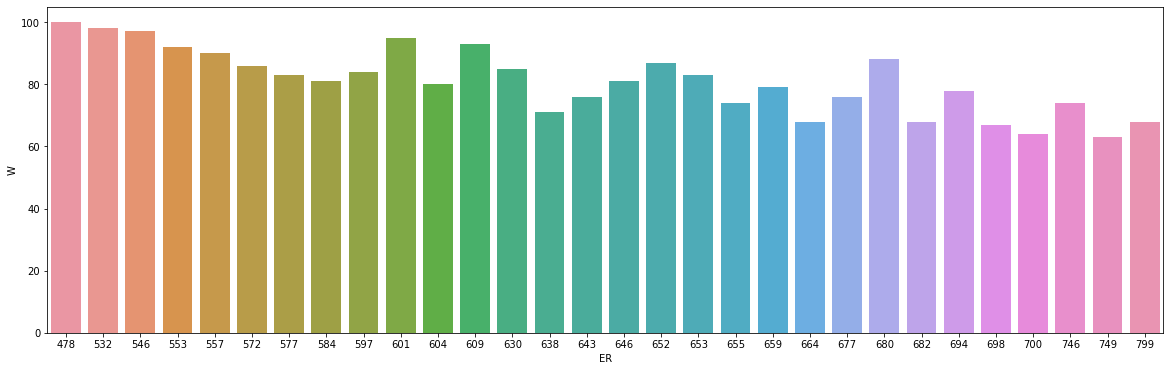

In [15]:
plt.figure(figsize=(20,6))
sns.barplot(x='ER',y='W',data=df)

<AxesSubplot:xlabel='RA', ylabel='W'>

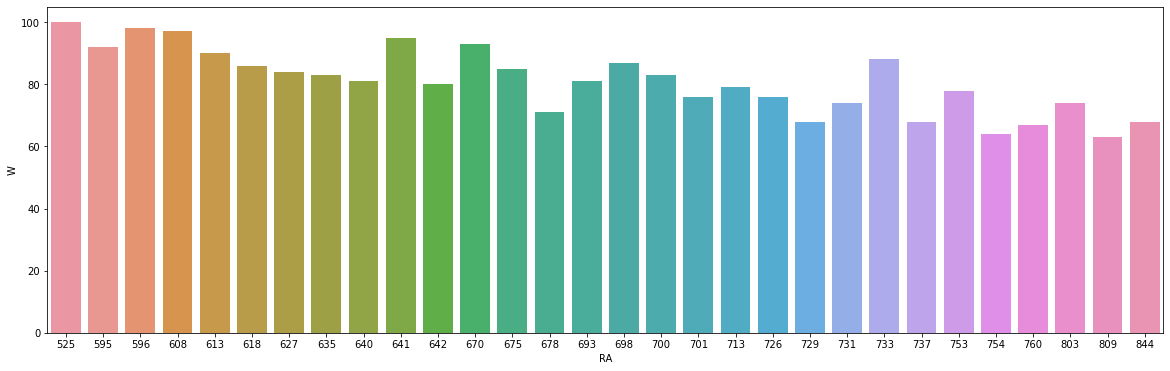

In [16]:
plt.figure(figsize=(20,6))
sns.barplot(x='RA',y='W',data=df)

<AxesSubplot:xlabel='SV', ylabel='W'>

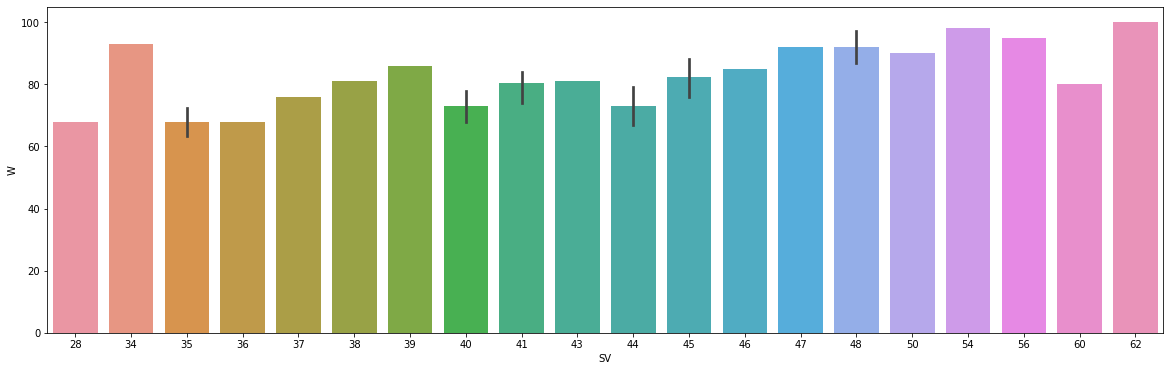

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(x='SV',y='W',data=df)

# Pairplot

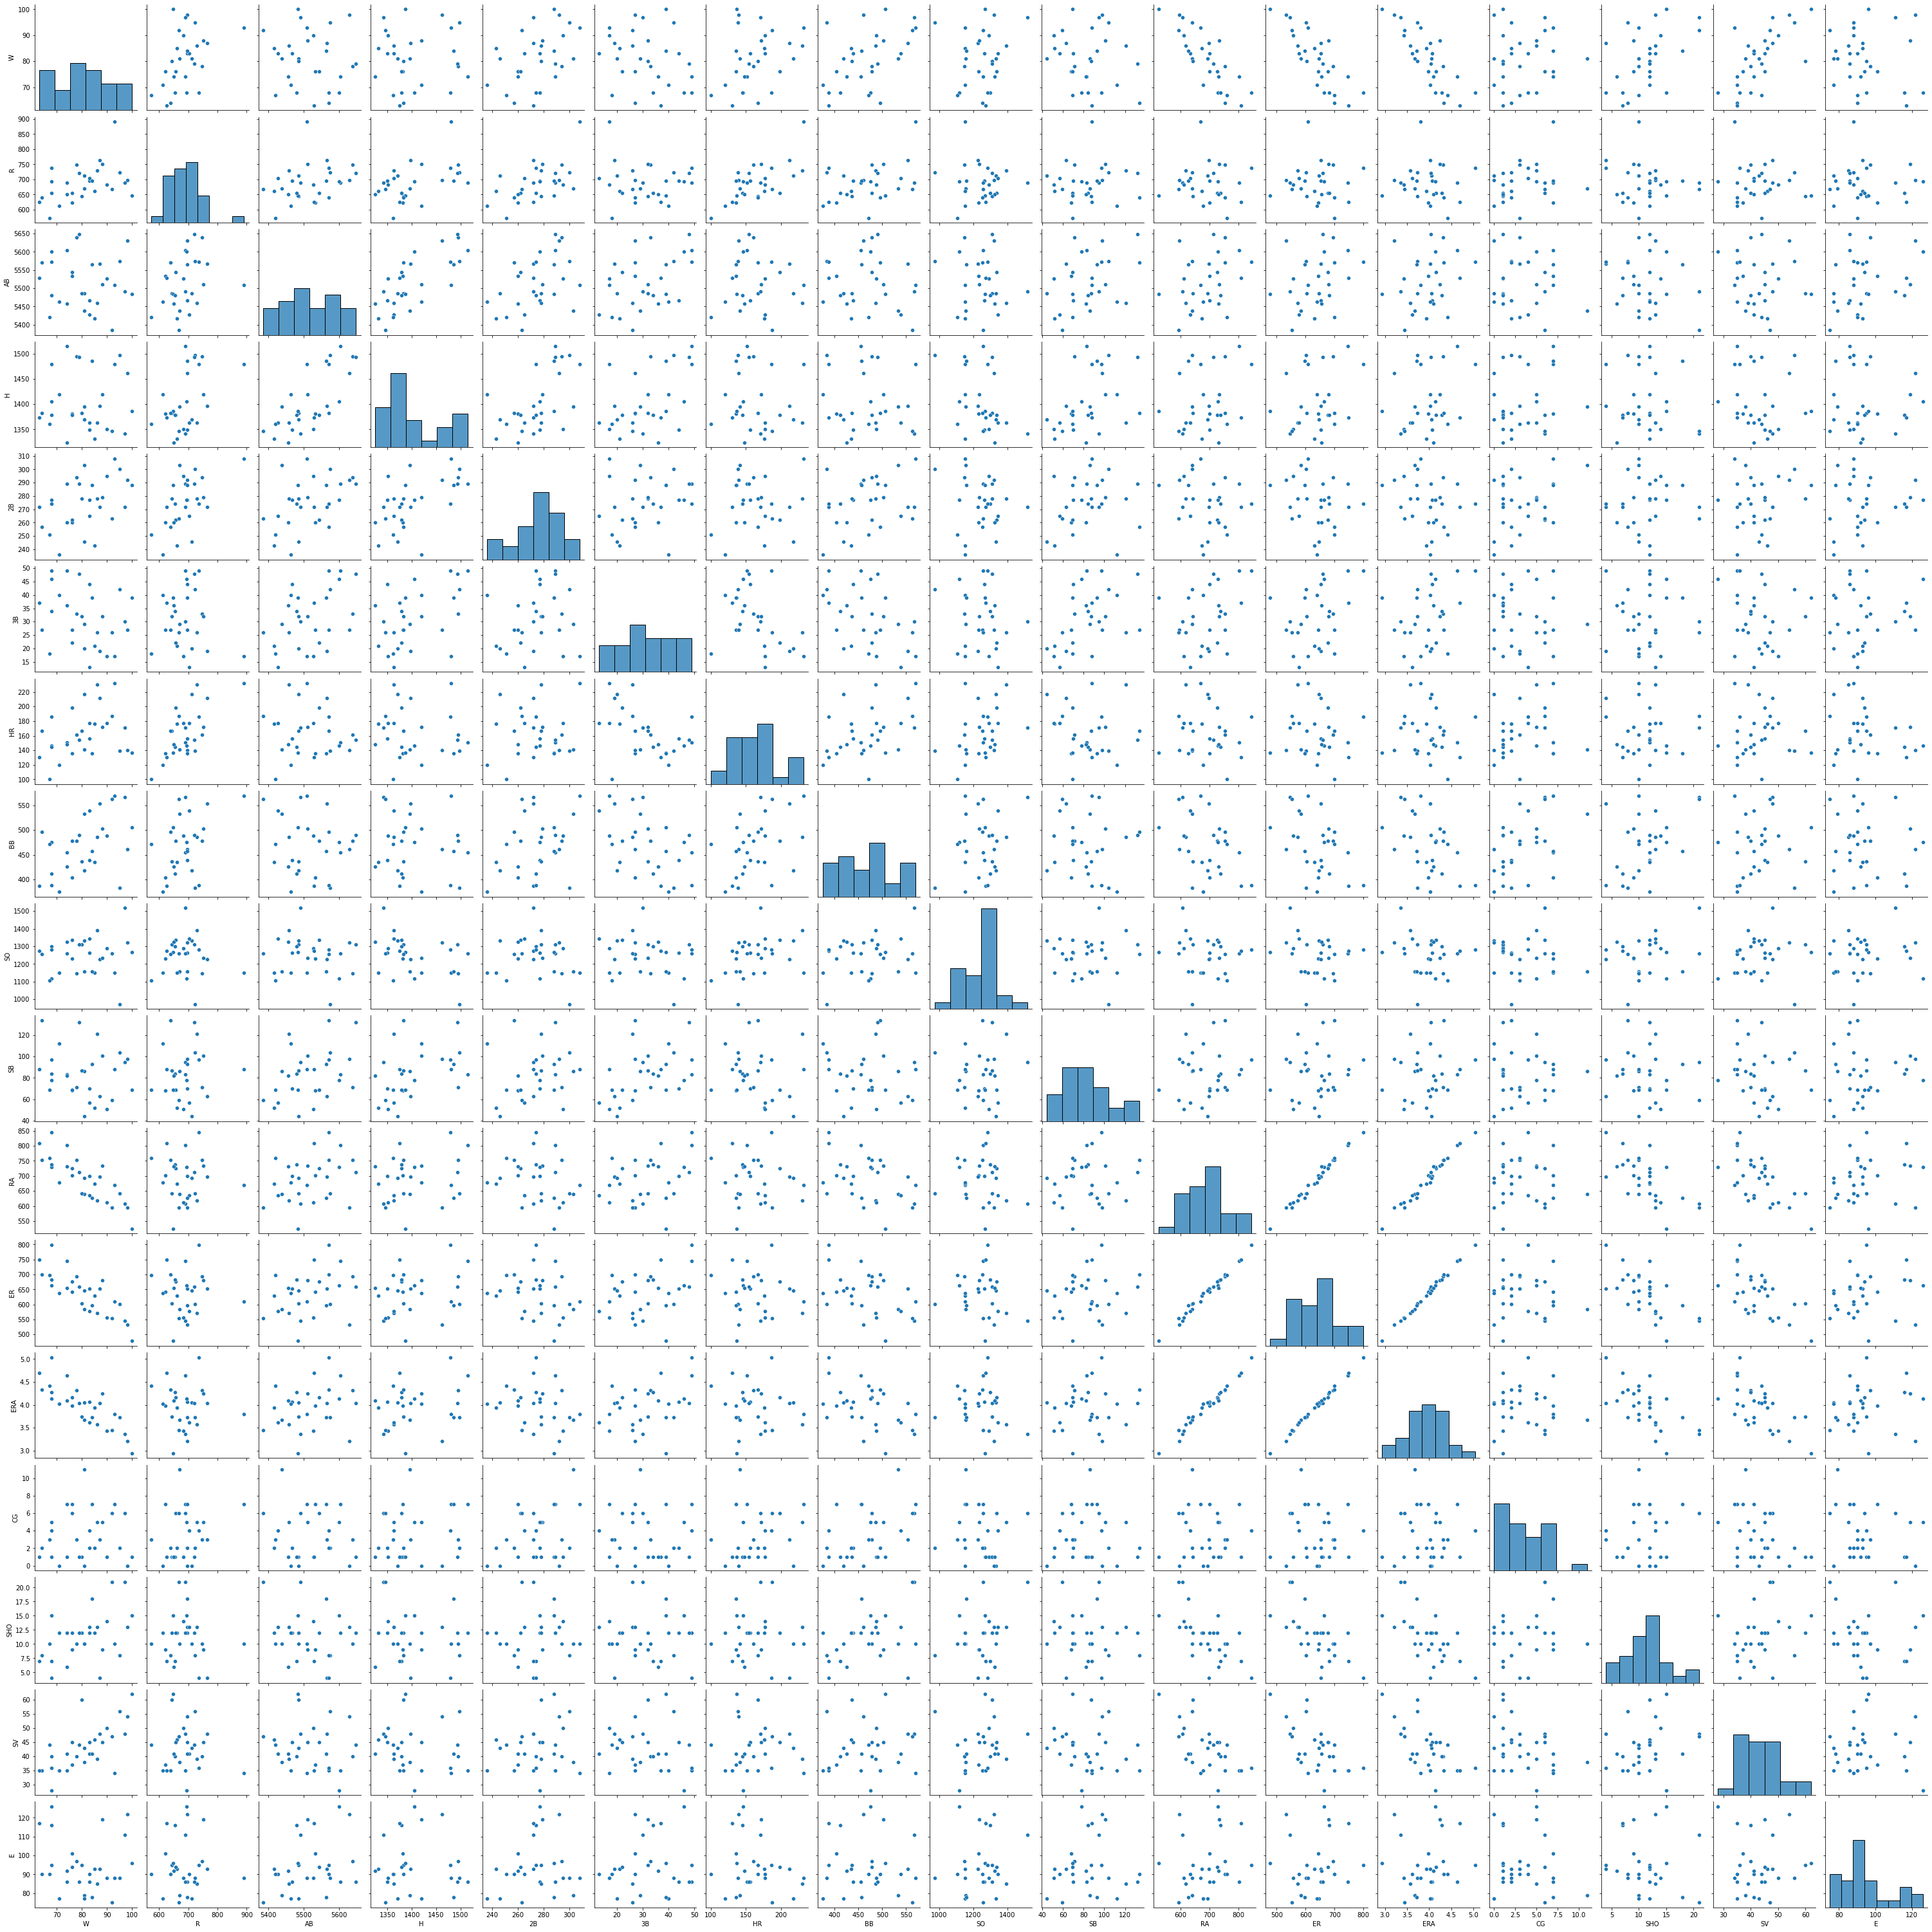

In [18]:
sns.pairplot(df)

# Scatter plot

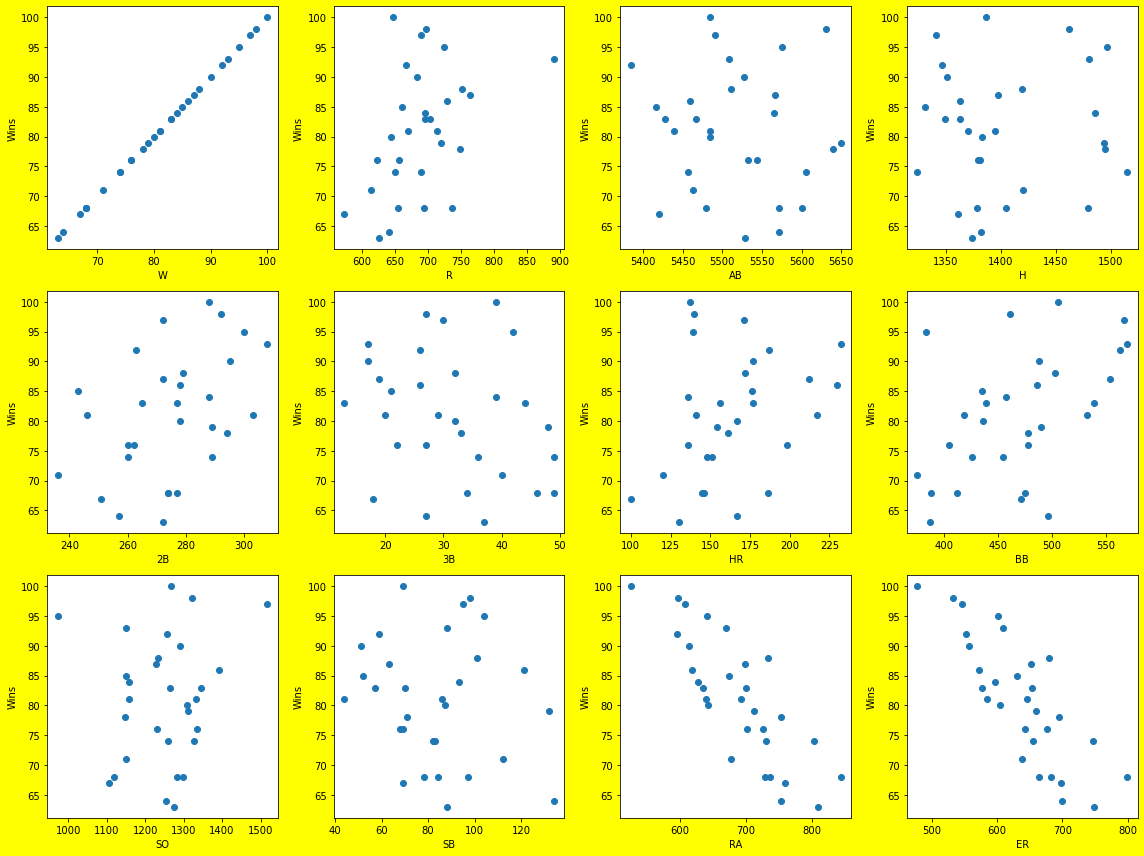

In [19]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(df[column],df['W'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Wins',fontsize=10)
        
        plotnumber+=1
    plt.tight_layout()

*  The above scatter diagrams shows relationship between features and labels 

# Finding Skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

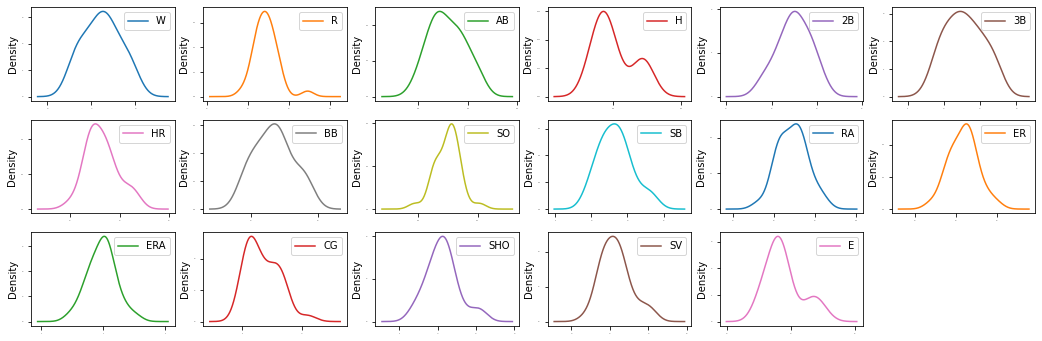

In [20]:
df.plot(kind='density',subplots=True,layout=(5,6),sharex=False,legend=True,figsize=(18,10),fontsize=1)

In [21]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

# Removing skewness

In [62]:
x=df.drop('W',axis=1)

In [63]:
x_skew=np.sqrt(x[x.columns])
x_skew.skew()

R      0.968676
AB     0.172254
H      0.649567
2B    -0.302835
3B    -0.142922
HR     0.264948
BB     0.053448
SO    -0.348513
SB     0.158381
RA    -0.096160
ER    -0.109548
ERA   -0.133224
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.763487
dtype: float64

# Distribution plot after removing skewed data

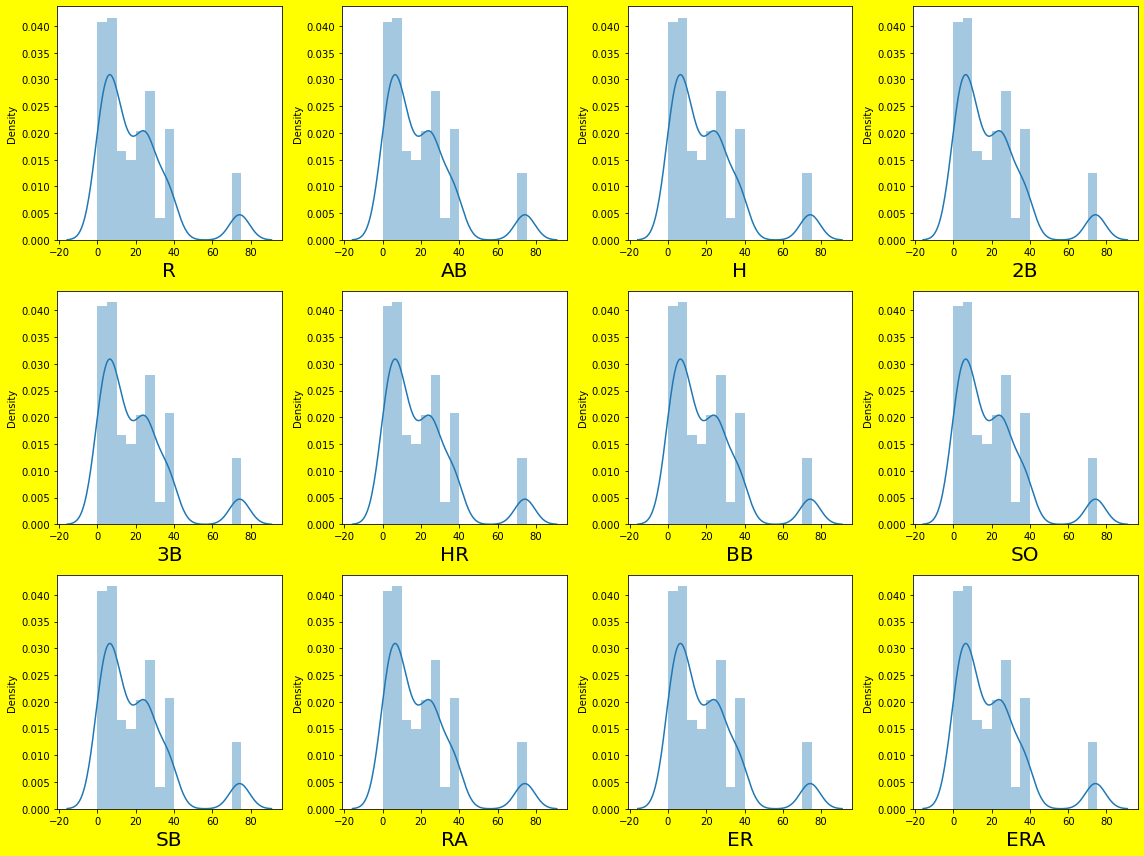

In [64]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in x_skew:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x_skew)
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()
    

# Finding Outliers

<AxesSubplot:>

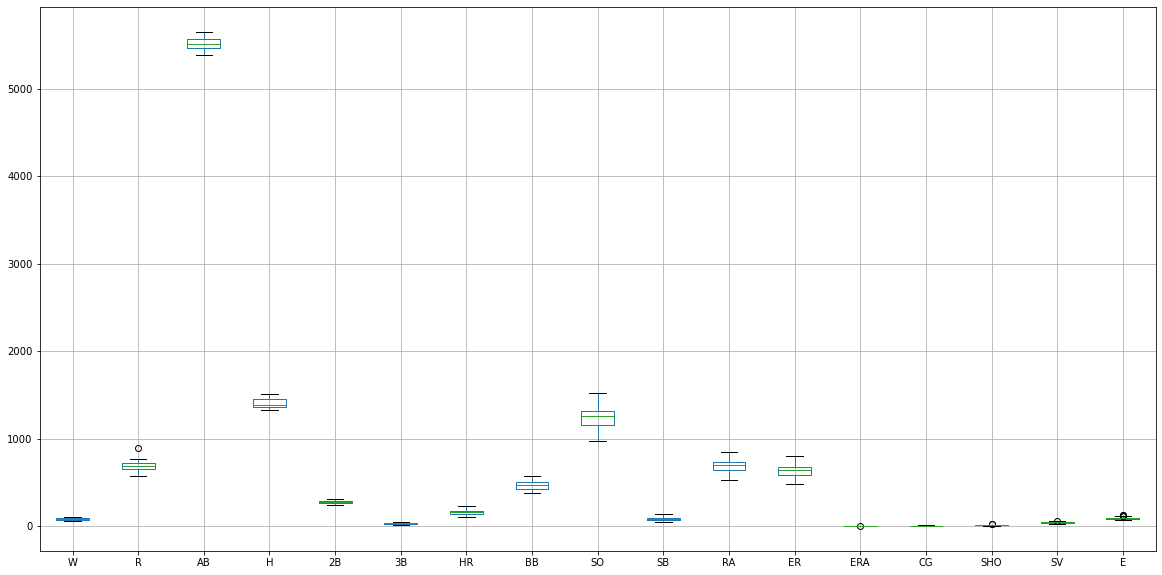

In [61]:
df.boxplot(figsize=(20,10))


In [33]:
(np.abs(zscore(df)<3)).all()

W       True
R      False
AB      True
H       True
2B      True
3B      True
HR      True
BB      True
SO      True
SB      True
RA      True
ER      True
ERA     True
CG      True
SHO     True
SV      True
E       True
dtype: bool

In [65]:
scores = np.abs(zscore(df))
t = 3
np.where(scores<3)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 

In [66]:
new_df = df[(scores<3).all(axis=1)]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       29 non-null     int64  
 1   R       29 non-null     int64  
 2   AB      29 non-null     int64  
 3   H       29 non-null     int64  
 4   2B      29 non-null     int64  
 5   3B      29 non-null     int64  
 6   HR      29 non-null     int64  
 7   BB      29 non-null     int64  
 8   SO      29 non-null     int64  
 9   SB      29 non-null     int64  
 10  RA      29 non-null     int64  
 11  ER      29 non-null     int64  
 12  ERA     29 non-null     float64
 13  CG      29 non-null     int64  
 14  SHO     29 non-null     int64  
 15  SV      29 non-null     int64  
 16  E       29 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


*  Hence we lost 1 row of data after removing outliers

In [68]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_skew)
x_new

array([[ 0.72834811,  0.        ,  0.        ,  1.47778932,  1.03306199,
        -0.76474072, -1.61061677, -2.57025842,  0.93974813, -0.66033425,
        -0.49741524, -0.50062906, -0.33503677, -0.78704435,  1.5464863 ,
        -0.33537946],
       [ 0.26127677,  0.        ,  0.        ,  0.08417474,  1.20400198,
        -0.15859001, -0.50289741,  0.13494007, -0.53999561,  0.17542831,
         0.2579546 ,  0.26163891, -0.33503677,  0.25064298,  0.36056077,
        -0.53264569],
       [-0.24484516,  0.        ,  0.        ,  1.67096478, -0.16174813,
        -0.68978145,  1.1283564 , -0.90119672,  0.21165657, -0.67462295,
        -0.74688742, -0.63613122,  2.09269735, -0.24483636, -0.60776771,
        -1.34217954],
       [-1.2852649 ,  0.        ,  0.        , -0.84858011, -0.36170434,
        -0.87917532, -1.1811481 , -0.18958075, -0.64283291,  0.18947502,
         0.11356071,  0.0607465 ,  1.19963317, -0.50918425, -0.76465171,
         0.67868363],
       [ 0.13566527,  0.        ,  0

In [70]:
df1=pd.DataFrame(x_new,columns=x_skew.columns)
df1

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.728348,0.0,0.0,1.477789,1.033062,-0.764741,-1.610617,-2.570258,0.939748,-0.660334,-0.497415,-0.500629,-0.335037,-0.787044,1.546486,-0.335379
1,0.261277,0.0,0.0,0.084175,1.204002,-0.158590,-0.502897,0.134940,-0.539996,0.175428,0.257955,0.261639,-0.335037,0.250643,0.360561,-0.532646
2,-0.244845,0.0,0.0,1.670965,-0.161748,-0.689781,1.128356,-0.901197,0.211657,-0.674623,-0.746887,-0.636131,2.092697,-0.244836,-0.607768,-1.342180
3,-1.285265,0.0,0.0,-0.848580,-0.361704,-0.879175,-1.181148,-0.189581,-0.642833,0.189475,0.113561,0.060747,1.199633,-0.509184,-0.764652,0.678684
4,0.135665,0.0,0.0,0.792116,1.619468,-0.329893,-0.206950,0.085489,0.079300,1.603279,1.582662,1.520789,1.199633,0.250643,-1.095215,-0.532646
5,2.671271,0.0,0.0,1.998856,-1.459341,1.937689,1.708401,-0.957905,0.297964,-0.247782,-0.380460,-0.342930,1.199633,-0.244836,-1.269617,-0.335379
6,1.309828,0.0,0.0,-0.198630,-1.223843,1.460152,1.461329,-0.228618,-0.910290,0.147323,0.243533,0.172429,0.046360,-2.102872,0.718289,0.104285
7,0.551309,0.0,0.0,-1.556331,-1.109573,1.583563,-0.904500,0.807146,-2.101557,0.076994,0.156921,0.217049,-1.866003,-0.244836,0.104639,-1.613941
8,-0.770368,0.0,0.0,0.141590,0.128946,0.200121,-0.559330,0.594551,0.254998,-0.646050,-0.453524,-0.478075,-0.814186,0.250643,1.905317,0.261351
9,1.088246,0.0,0.0,1.099395,0.223598,0.007429,0.204430,-0.986203,-0.489406,0.914794,0.845885,0.794467,0.046360,-0.244836,-0.309209,0.408957


In [76]:
#X=df1.drop('W',axis=1)
y=new_df['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Scaling Data

In [77]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_new=pd.DataFrame(std.fit_transform(X),columns=X.columns)
X_new

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.962515,0.0,1.651487,1.685427,1.005945,-0.741980,-1.604935,-2.551005,0.936193,-0.660986,-0.508045,-0.509013,-0.286701,-0.784491,1.532785,-0.348708
1,0.298806,0.0,-1.026957,0.138080,1.185714,-0.109933,-0.462235,0.093714,-0.516756,0.160175,0.235770,0.241313,-0.286701,0.235600,0.312153,-0.541259
2,-0.312135,0.0,-0.006597,1.907758,-0.230061,-0.664398,1.232192,-0.935543,0.224698,-0.674974,-0.752193,-0.641762,2.122286,-0.252302,-0.664259,-1.325956
3,-1.308239,0.0,-0.325459,-0.837644,-0.433121,-0.860105,-1.162675,-0.230628,-0.618765,0.174026,0.093066,0.042993,1.244508,-0.512000,-0.820841,0.650920
4,0.137683,0.0,1.906577,0.911380,1.625459,-0.289643,-0.155849,0.044178,0.094658,1.576038,1.555873,1.493294,1.244508,0.235600,-1.149352,-0.541259
5,1.964390,0.0,0.057175,-0.163103,-1.294535,1.631596,1.579735,-0.269526,-0.884723,0.132467,0.221507,0.153195,0.097152,-2.067367,0.677368,0.082564
6,0.698097,0.0,-0.516777,-1.542492,-1.181757,1.767647,-0.877268,0.770948,-2.081237,0.063159,0.135894,0.197259,-1.863677,-0.252302,0.052393,-1.587579
7,-0.852577,0.0,-0.261687,0.199777,0.067175,0.269191,-0.520606,0.555996,0.267234,-0.647001,-0.465012,-0.486899,-0.772983,0.235600,1.907886,0.237392
8,1.556020,0.0,1.651487,1.255300,0.164461,0.065060,0.270798,-1.019145,-0.466625,0.891368,0.819274,0.769251,0.097152,-0.252302,-0.365055,0.383286
9,1.631813,0.0,0.439810,0.261965,0.067175,0.434697,0.717509,-0.211146,0.824897,0.616129,0.620309,0.615399,0.722597,-0.512000,0.312153,1.554724


# Finding Best Random State

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21, 16) (8, 16) (21,) (8,)


# Modeling using LinearRegression

In [80]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
y_pred

array([66.40170785, 72.08834896, 76.01582806, 78.92768838, 89.4650252 ,
       88.77969935, 85.04386379, 84.01044246])

# Modeling using RandomForestRegressor

In [82]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
y_predclf=clf.predict(x_test)
y_predclf

array([74.76, 76.18, 80.97, 81.84, 90.33, 89.37, 77.24, 84.06])

# Evaluation score for LinearRegressor

In [83]:
#Evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
#r2 score
r2=r2_score(y_test,y_pred)
print('R2 Score is: ',r2)

RMSE:  7.6031528968990365
R2 Score is:  0.6029930492207373


# Evaluation score for RandomForestRegressor

In [86]:
#Evaluation
mse=mean_squared_error(y_test,y_predclf)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
#r2 score
r2=r2_score(y_test,y_predclf)
print('R2 Score is: ',r2)


RMSE:  7.3079024008261095
R2 Score is:  0.6332280287584504


# HyperParameter Tuning using bets GridSearchCV method

In [87]:
grid_param={               #The maximum depth of tree 
    'min_samples_leaf':range(2,10),         # The minimum number of samples required to be at a leaf node.
    'min_samples_split':range(3,10),         
    
}
print(grid_param)

{'min_samples_leaf': range(2, 10), 'min_samples_split': range(3, 10)}


In [88]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)     # Use all the cores in your system.For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [89]:
best_parameters=grid_search.best_params_
best_parameters

{'min_samples_leaf': 4, 'min_samples_split': 3}

In [90]:
clf=RandomForestRegressor(min_samples_leaf= 4, min_samples_split= 3)

clf.fit(x_train,y_train)
y_predclf=clf.predict(x_test)
y_predclf

array([76.84921542, 74.8493085 , 80.67375061, 81.61342421, 88.06189116,
       89.5779864 , 76.55899906, 83.89903316])

In [91]:
mse=mean_squared_error(y_test,y_predclf)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predclf)

print("R2 Score is: ",r2)
print("RMSE value is: ",rmse)

R2 Score is:  0.591198672843907
RMSE value is:  7.7152644637996195


# Saving Model

In [93]:
import joblib
joblib.dump(grid_search.best_params_,"Baseball.pkl")

['Baseball.pkl']